In [ ]:
import sys
sys.path.append('../')
from src.compress_sensing_library import *
import pandas as pd

In [35]:
hyperparam_track = data_save_path('tree_part1', 'dct', 'V1', 'test')
hyperparam_track = hyperparam_track.split('.')[0] + '.txt'
rep = 10
alp = [1, 2, 3, 4, 5, 6]
num_cell = [50, 100, 200]
cell_size = [1, 2, 4, 6, 8]
sparse_freq = [1, 2, 4, 6, 8]
search_list = [rep, alp, num_cell, cell_size, sparse_freq]

hyperparam_list = list(zip(search_df.columns, search_list))

f = open(hyperparam_track, "a+")
f.write("nameofFile\n")
for i in hyperparam_list:
    f.write(f"   {i[0]}: {i[1]}\n")
f.write("\n\n")
f.close()

upper triggered: V1


In [15]:
search_df = pd.DataFrame(columns= [ 'rep', 'alp', 'num_cell', 'cell_size', 'sparse_freq'])
search_df.columns[1:]

Index(['alp', 'num_cell', 'cell_size', 'sparse_freq'], dtype='object')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import *

In [31]:
img_nm = 'tree_part1'
root = search_root()
load_V1 = '{root}/result/dct/{img}/V1/color_param_Fri_May_12_17_45_15_2023.csv'.format(root = root, img = img_nm)
load_pixel = '{root}/result/dct/{img}/pixel/color_param_Fri_May_12_16_46_28_2023.csv'.format(root = root, img = img_nm)
load_gaussian = '{root}/result/dct/{img}/gaussian/color_param_Fri_May_12_16_46_08_2023.csv'.format(root = root, img = img_nm)
directory = "num_cell_error"
save = True
data = [load_pixel, load_gaussian, load_V1]

In [32]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [33]:
V1_param_df

,rep,alp,num_cell,cell_size,sparse_freq,error
0,0,0.001,50,1,1,140.450802
1,0,0.001,50,1,2,195.519780
2,0,0.001,50,1,4,221.493346
3,0,0.001,50,1,6,221.502516
4,0,0.001,50,1,8,219.336160
...,...,...,...,...,...,...
13995,19,1000.000,500,8,1,69.212788
13996,19,1000.000,500,8,2,52.488433
13997,19,1000.000,500,8,4,50.776755
13998,19,1000.000,500,8,6,53.899237


In [34]:
V1_param_df.loc[V1_param_df['num_cell'] == 50]

,rep,alp,num_cell,cell_size,sparse_freq,error
0,0,0.001,50,1,1,140.450802
1,0,0.001,50,1,2,195.519780
2,0,0.001,50,1,4,221.493346
3,0,0.001,50,1,6,221.502516
4,0,0.001,50,1,8,219.336160
...,...,...,...,...,...,...
13920,19,1000.000,50,8,1,74.738470
13921,19,1000.000,50,8,2,62.431741
13922,19,1000.000,50,8,4,52.519964
13923,19,1000.000,50,8,6,54.726482


In [35]:
V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.1) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

,rep,alp,num_cell,cell_size,sparse_freq,error
222,0,0.1,50,8,4,218.324079
922,1,0.1,50,8,4,226.209991
1622,2,0.1,50,8,4,225.006741
2322,3,0.1,50,8,4,210.164819
3022,4,0.1,50,8,4,213.554172
3722,5,0.1,50,8,4,208.661339
4422,6,0.1,50,8,4,221.450860
5122,7,0.1,50,8,4,217.438060
5822,8,0.1,50,8,4,220.358884
6522,9,0.1,50,8,4,218.332870


In [36]:
temp = V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.01) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

temp2 = V1_param_df.groupby(
    ['num_cell', 'cell_size', 'sparse_freq', 'alp'], as_index=False).mean().drop('rep', axis=1) 
temp2.loc[(temp2['num_cell'] == 50) & (temp2['alp'] == 0.1) & (temp2['cell_size'] == 8) & (temp2['sparse_freq'] == 4)]

,num_cell,cell_size,sparse_freq,alp,error
156,50,8,4,0.1,216.967216


In [39]:
temp3.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1)

,num_cell,sparse_freq,cell_size,alp,error
0,50,1,1,0.001,137.887991
1,50,1,1,0.010,138.662410
2,50,1,1,0.100,114.038187
3,50,1,1,1.000,77.762571
4,50,1,1,10.000,74.941483
...,...,...,...,...,...
170,50,8,8,0.100,225.990907
171,50,8,8,1.000,45.392222
172,50,8,8,10.000,47.625088
173,50,8,8,100.000,50.883049


In [72]:
temp3 = V1_param_df.loc[V1_param_df['num_cell'] == 500]

# temp3.loc[(temp3['error'] == temp3['error'].min())]
temp50 = temp3.groupby(
    ['num_cell', 'cell_size', 'sparse_freq', 'alp'], as_index=False).mean().drop('rep', axis=1)
num_cell, cell_size, sparse_freq, alpha, error = temp50.loc[(temp50['error'] == temp50['error'].min())].values.squeeze()
num_cell = int(num_cell)
cell_size = int(cell_size)
sparse_freq = int(sparse_freq)

In [73]:
print('minimum parameter')
temp50.loc[(temp50['error'] == temp50['error'].min())]

minimum parameter


,num_cell,cell_size,sparse_freq,alp,error
148,500,8,2,0.01,21.790609


In [74]:
V1_param_df.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['alp'] == alpha)]

,rep,alp,num_cell,cell_size,sparse_freq,error
196,0,0.01,500,8,2,21.920640
896,1,0.01,500,8,2,21.397793
1596,2,0.01,500,8,2,21.945539
2296,3,0.01,500,8,2,21.715739
2996,4,0.01,500,8,2,21.798445
3696,5,0.01,500,8,2,22.094494
4396,6,0.01,500,8,2,21.383301
5096,7,0.01,500,8,2,21.466175
5796,8,0.01,500,8,2,22.039434
6496,9,0.01,500,8,2,21.891424


Process Reconstruction on (30, 30, 3) image


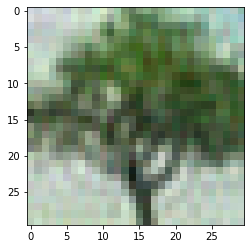

21.821879947530746
Process Reconstruction on (30, 30, 3) image


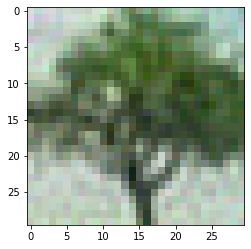

22.10218692045352
Process Reconstruction on (30, 30, 3) image


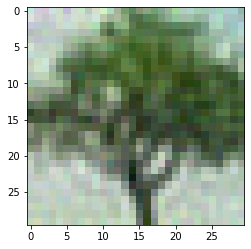

21.812432744245246
Process Reconstruction on (30, 30, 3) image


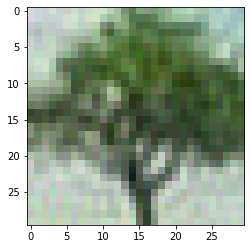

22.197146963817968
Process Reconstruction on (30, 30, 3) image


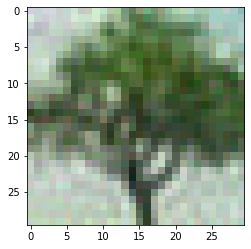

21.67794578213843
Process Reconstruction on (30, 30, 3) image


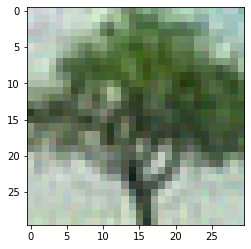

21.880483439713018
Process Reconstruction on (30, 30, 3) image


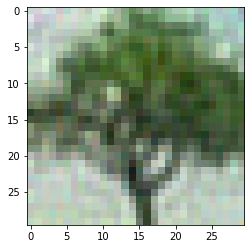

22.226535692475533
Process Reconstruction on (30, 30, 3) image


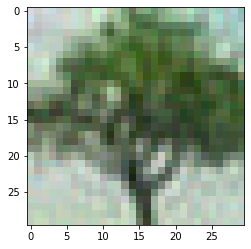

21.917065902574134
Process Reconstruction on (30, 30, 3) image


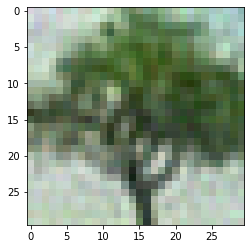

21.859526273203837
Process Reconstruction on (30, 30, 3) image


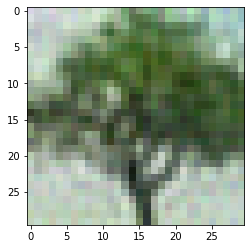

21.742840456368874
Process Reconstruction on (30, 30, 3) image


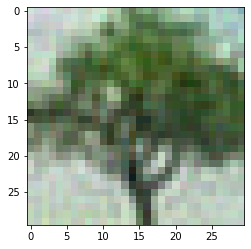

21.866336379619394
Process Reconstruction on (30, 30, 3) image


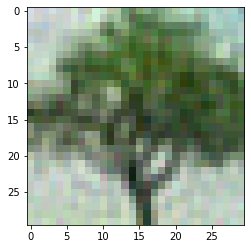

22.322360488482794
Process Reconstruction on (30, 30, 3) image


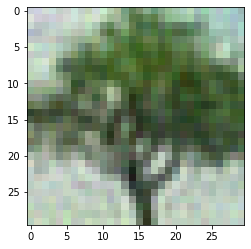

22.067623342806993
Process Reconstruction on (30, 30, 3) image


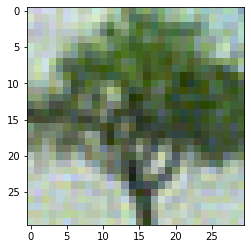

26.534212715745767
Process Reconstruction on (30, 30, 3) image


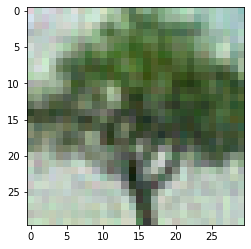

22.23063451885958
Process Reconstruction on (30, 30, 3) image


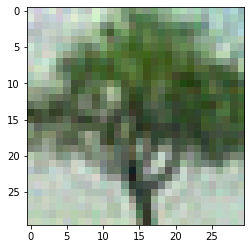

21.93748694206639
Process Reconstruction on (30, 30, 3) image


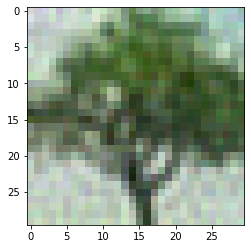

22.194118339976672
Process Reconstruction on (30, 30, 3) image


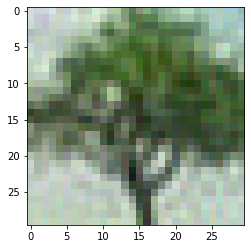

21.953233120532484
Process Reconstruction on (30, 30, 3) image


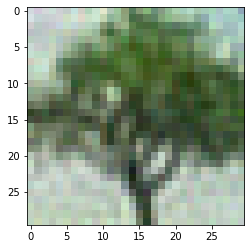

21.621157333603684
Process Reconstruction on (30, 30, 3) image


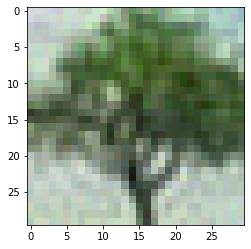

21.95644678802915
22.19608270461221


In [75]:
root = search_root()
img = Image.open(os.path.join(root, "image/tree_part1.jpg"))
img_arr = np.asarray(img)
rep = 20
avg = 0
result=[]
for i in range(0, 20):
    reconst = filter_reconstruct(img_arr, num_cell=num_cell, cell_size = cell_size, sparse_freq=sparse_freq, alpha = alpha, observation = 'V1', mode = 'color')
#     reconst = filter_reconstruct(img_arr, num_cell=50, cell_size = 1, sparse_freq=1, alpha = 0.001, observation = 'V1', mode = 'color')
    error = error_calculation(img_arr, reconst)
    plt.imshow(reconst)
    plt.show()
    print(error)
    avg+=error
    result.append(error)
print(avg/20)


In [139]:
pd.DataFrame(result, columns=['error'])

,error
0,33.538353
1,34.284707
2,33.934578
3,33.956623
4,34.184987
5,33.913730
6,34.158031
7,34.334628
8,34.066699
9,34.121841


In [119]:
error

34.11475348208387

In [120]:
V1_param_df.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['alp'] == alpha)].groupby(['alp', 'num_cell', 'cell_size', 'sparse_freq']).mean()

,,,,rep,error
alp,num_cell,cell_size,sparse_freq,,
1.0,200,6,2,9.5,34.114753
